# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 25px; color: #f7f9ff; text-align: center; line-height: 0.75;background-color: #F23825"><b>Heart Failure Prediction</b><br></h1>

<center>
    <img src="https://d2jx2rerrg6sh3.cloudfront.net/image-handler/picture/2021/1/shutterstock_1576424071.jpg" alt="Heart Failure Prediction" width="25%">
</center>

In [3]:
import numpy as np
import pandas as pd
from numpy.random import randn
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [4]:
heart = pd.read_csv('heart.csv')

## Data Loading

We use 'pd.read_csv' to load the dataset into a DataFrame. This function reads a CSV file and converts it into a structured format that we can work with in Python.

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### <center>Dataset Attributes</center>
    
- **Age** : age of the patient [years]
- **Sex** : sex of the patient [M: Male, F: Female]
- **ChestPainType** : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- **RestingBP** : resting blood pressure [mm Hg]
- **Cholesterol** : serum cholesterol [mm/dl]
- **FastingBS** : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG** : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR** : maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina** : exercise-induced angina [Y: Yes, N: No]
- **Oldpeak** : oldpeak = ST [Numeric value measured in depression]
- **ST_Slope** : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease** : output class [1: heart disease, 0: Normal]

### Problem Statement :


### Aim :
- To analyse whether a patient is prone to heart failure.

## Data Preview: 

We use .head() to look at the first few rows of our dataset and .tail() to look at the last few rows of the dataset. This gives us an idea of what the data looks like, including the columns (features) and some sample values. It's like taking a quick glance at a book’s table of contents.

In [9]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
heart.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


## Data Information

Before analyzing data, it's crucial to check the info of your dataset by using .info(). This is important so as to check the nature of the dataset and some basic information like datatypes, the type of data it is, total rows and columns and so on.

In [11]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


## Checking for Missing Data


Explanation: It’s important to know if our data has any gaps or missing values. These gaps can affect the accuracy of our analysis. Using .isnull().sum(), we count how many missing values are in each column.

In [13]:
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [14]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Understanding Distributions
### Numerical Data:

We use histograms to see how our numerical data (like Age, Cholesterol, MaxHR) is spread out. This helps us understand what values are common and if there are any unusual values (outliers).
Why Use It: Histograms are great for understanding the shape of the data (e.g., is it normal, skewed?).

In [16]:
numerical_columns = heart.select_dtypes(exclude=['object']).columns
numerical_columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

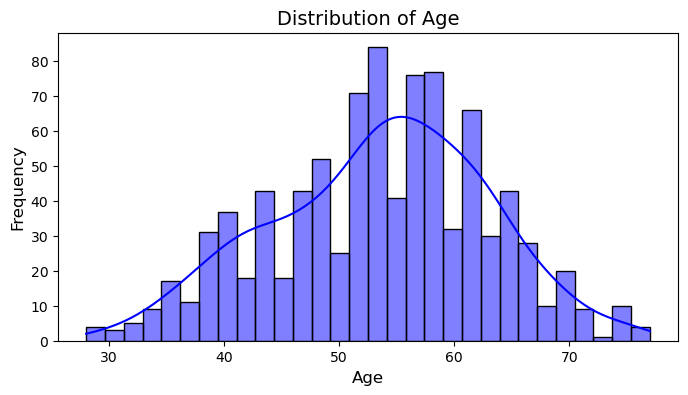

In [17]:
plt.figure(figsize=(8, 4))
sns.histplot(data=heart, x='Age', kde=True, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#### Observation:

The histogram with a KDE curve displays the age distribution of patients in the dataset.

The data shows a fairly normal distribution, with most patients falling between 50 and 60 years of age.
There are fewer patients in the younger age group (below 40) and older age group (above 70).
This suggests that heart disease is more commonly observed in middle-aged and elderly patients.


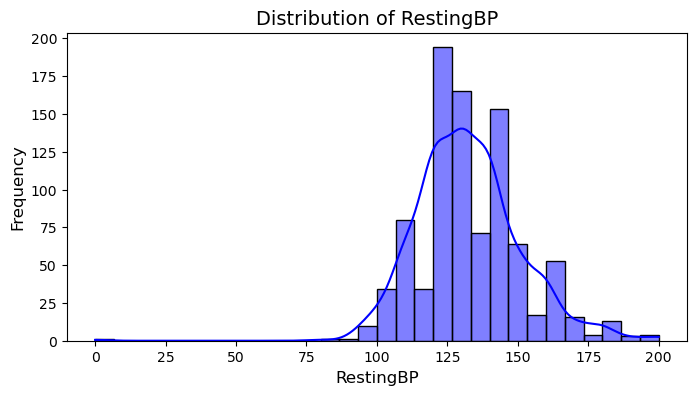

In [19]:
plt.figure(figsize=(8, 4))
sns.histplot(data=heart, x='RestingBP', kde=True, bins=30, color='blue', edgecolor='black')
plt.title('Distribution of RestingBP', fontsize=14)
plt.xlabel('RestingBP', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#### Observation:

The histogram with a KDE curve shows the resting blood pressure of patients.

Most patients have a resting blood pressure between 110 and 140 mmHg.
There are some extreme values (outliers) around 200 mmHg and close to 0, which might need investigation.
Implication:
Resting blood pressure is an essential factor in assessing heart health, and unusually high or low values could indicate potential measurement errors or extreme health conditions.

### Categorical Data:

For columns like ChestPainType and HeartDisease, we use bar plots. These show us how many people fall into each category, like how many have a certain type of chest pain.
Why Use It: Bar plots are ideal for comparing categories.

In [21]:
categorical_columns = heart.select_dtypes(include=['object']).columns
categorical_columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [22]:
categorical_summary = heart[categorical_columns].describe()
categorical_summary

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


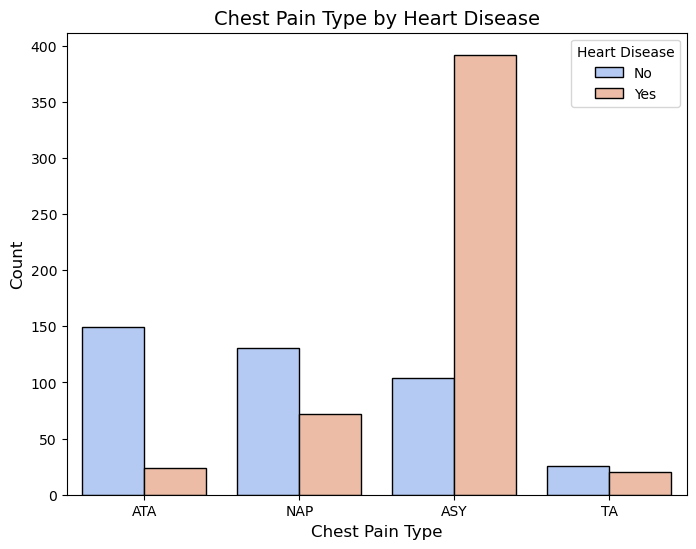

In [23]:
# Bar plot example: ChestPainType vs. HeartDisease
plt.figure(figsize=(8, 6))
sns.countplot(data=heart, x='ChestPainType', hue='HeartDisease', palette='coolwarm', edgecolor='black')
plt.title('Chest Pain Type by Heart Disease', fontsize=14)
plt.xlabel('Chest Pain Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

#### Observations
The bar plot shows how different types of chest pain are distributed among patients with and without heart disease.
- ATA (Asymptomatic): Most patients without heart disease fall under this type.
- NAP (Non-Anginal Pain): This type is fairly balanced between patients with and without heart disease.
- ASY (Asymptomatic): A significant number of patients with heart disease are classified under this chest pain type.
- TA (Typical Angina): This is the least common chest pain type for both groups.

Patients with asymptomatic (ASY) chest pain are more likely to have heart disease.
Chest pain type may serve as a strong predictor when modeling heart disease.

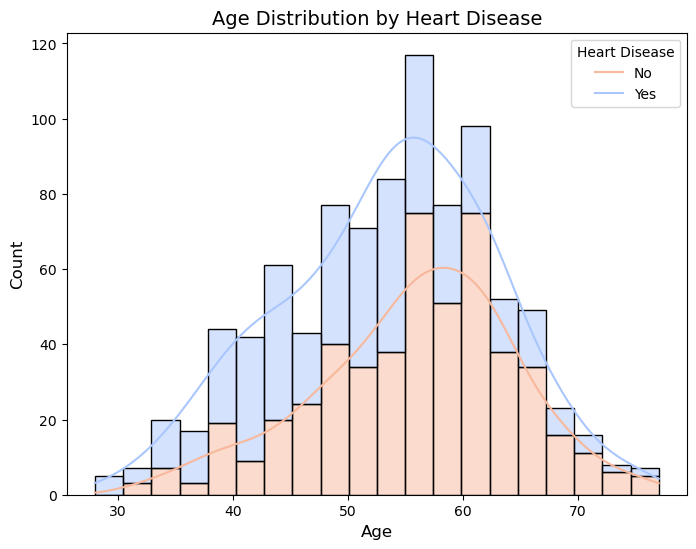

In [62]:
# Histogram showing Age distribution split by Heart Disease
plt.figure(figsize=(8, 6))
sns.histplot(data=heart, x='Age', hue='HeartDisease', kde=True, palette='coolwarm', bins=20, multiple="stack")
plt.title('Age Distribution by Heart Disease', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

#### Observations

- Heart disease is more common among patients in their 50s and 60s. The proportion of patients with heart disease increases in this age range.
- Older patients (above 70) are more likely to have heart disease compared to younger patients (below 40), but they represent a smaller sample in the dataset.
- Some age groups (e.g., 50–60) contain both patients with and without heart disease, suggesting that age alone cannot fully predict heart disease.

### Correlation Analysis (Numerical Data)


Correlation tells us how strong the relationship is between two numerical columns. For example, if cholesterol and heart disease are highly correlated, we’ll see a high correlation value. A heatmap makes it easier to visualize these relationships.

Why Use It: Correlation helps identify which features are important for prediction.

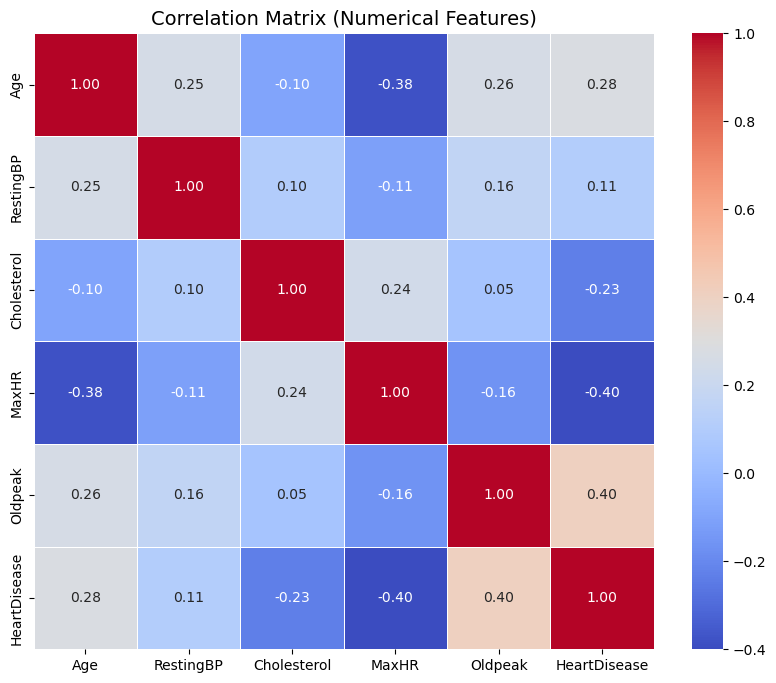

In [27]:
# Select only numerical columns
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
heart_numerical = heart[numerical_columns]

# Compute correlation matrix for numerical columns
plt.figure(figsize=(10, 8))
correlation_matrix = heart_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Numerical Features)', fontsize=14)
plt.show()

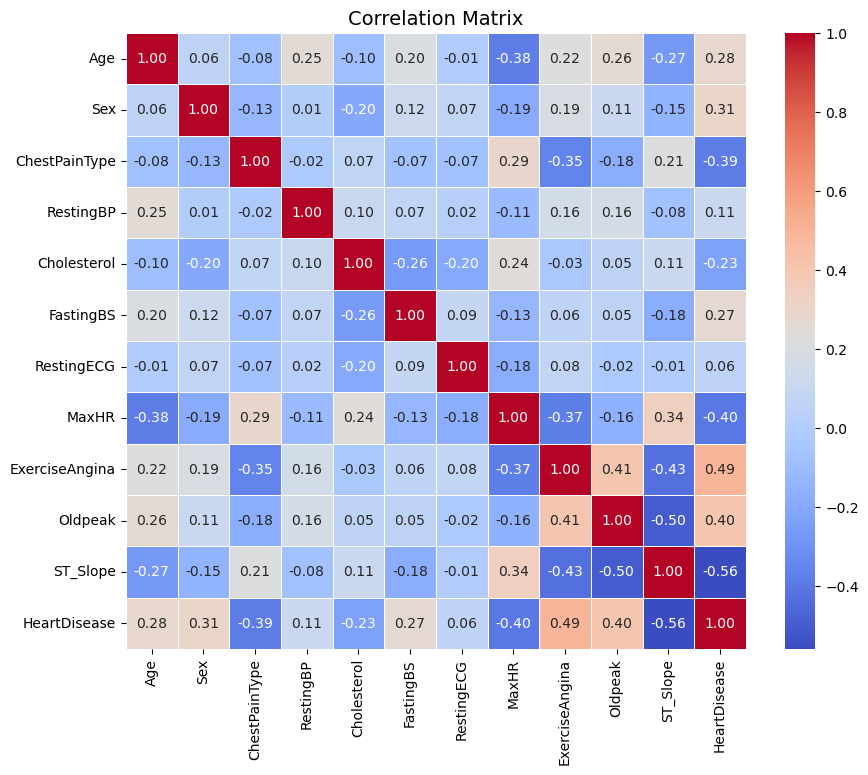

In [28]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
heart_encoded = heart.copy()

# Apply LabelEncoder to each categorical column
label_encoder = LabelEncoder()
for col in categorical_columns:
    heart_encoded[col] = label_encoder.fit_transform(heart_encoded[col])

# Compute correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = heart_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

### Scatterplots

A scatterplot (e.g., Age vs. MaxHR) shows how two variables relate. For example, we can see if older people have lower maximum heart rates.
Why Use It: Scatterplots are useful for spotting trends or patterns between two variables.

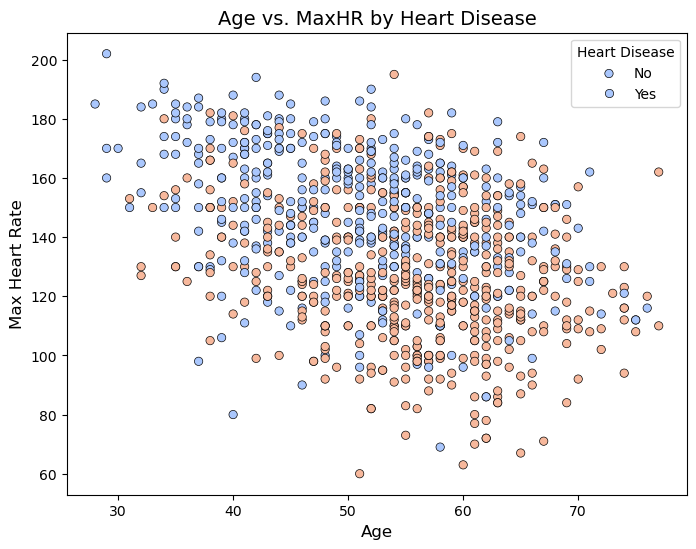

In [30]:
# Scatterplot example: Age vs. MaxHR
plt.figure(figsize=(8, 6))
sns.scatterplot(data=heart, x='Age', y='MaxHR', hue='HeartDisease', palette='coolwarm', edgecolor='k')
plt.title('Age vs. MaxHR by Heart Disease', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Max Heart Rate', fontsize=12)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()